## Calculation of activity after a given time based on an initial activity

A calculation of the amount of radioactivity left in a sample of a specified nuclide after a time.  
The data for a small sample set of nuclides is read from a csv file, it has 3 columns nuclide, halflife and unit.  Unit is the time unit for the halflife specified, s = seconds, d = days etc

uses the classic radioactive decay equation  
$$
A(t) = A_0e^{(-\lambda t)}
$$


Learning objectives:
* reading csv file manually
* reading csv file using pandas
* dealing with messy data, in this case the time units
* filtering and using pandas
* lists of lists
* handling of arrays as well as single values

In [4]:
# import numpy, pandas and matplot lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# file reading

# firstly a manual core python approach
def read_data_file(fpath):
    """ reads a file manually """ 
    data = []
    with open(fpath) as f:
        data = [line.split(', ') for line in f.read().splitlines()]
    f.close()
    return data

# alternatively using pandas
def read_data_file_pandas(fpath):
    """ read the file using the built in pandas methods """
    data = pd.read_csv(fpath, sep = ", ")
    return data

In [6]:
# timing functions
def years_to_seconds(y):
    """ converts years to seconds"""
    s = y * 365 * 24 * 60 * 60
    return s

def days_to_seconds(d):
    """ converts days to seconds """
    s = d * 24 * 60 * 60
    return s

def hours_to_seconds(h):
    """ converts hours to seconds"""
    s = h * 60 * 60
    return s

def mins_to_seconds(m):
    """ converts minutes to seconds """
    s = m * 60
    return s

def convert_time(t, unit):
    """ entrance function for conversion of time to seconds """
    
    if unit == "s":
        return t
    elif unit == "m":
        return mins_to_seconds(t)
    elif unit == "h":
        return hours_to_seconds(t)
    elif unit == "d":
        return days_to_seconds(t)
    elif unit == "y":
        return years_to_seconds(t)
    else:
        print("time unit not recognised")
        return 0


In [7]:
# act calc

def calc_act(hl, unit, act_zero, time):
    """ does the actual activity calculation common for any data """
     # need to convert halflife to seconds
    hl = convert_time(hl, unit)
    
    lam = np.log(2)/float(hl)  # cast to float here just in case but probably not needed
    
    act = act_zero * np.exp(-1*lam*time)
    return act
    

def calc_act_list(nuc, act_zero, time, data):
    """ calculate activity using list data"""
    
    # get the specific nuclide data
    for n in data:
        if nuc in n:
            hl = float(n[1])   # this float is needed as it reads it as a string
            unit = n[2]
    
    act = calc_act(hl, unit, act_zero, time)
    return act


def calc_act_pandas(nuc, act_zero, time, data):
    """  calculate activity using pandas data"""
    
    # get the nuclide specific data
    nuc_data = data.loc[data['nuclide'] == nuc]
    hl = nuc_data.iloc[0]['halflife']
    unit = nuc_data.iloc[0]['unit']

    act = calc_act(hl, unit, act_zero, time)
    return act

In [10]:
# enter the initial data
ini_act = 1e9
decay_time = 6.3 * 365 * 24 * 60 * 60  # this should be in seconds
filepath = "half_lives.txt"
nuclide = "Co60"

# first using the list version of the reader 
data = read_data_file(filepath)
act = calc_act_list(nuclide, ini_act, decay_time, data)
print("list", act)

# now in pandas
data = read_data_file_pandas(filepath)
act = calc_act_pandas(nuclide, ini_act, decay_time, data)
print("Pandas", act)

list 436651463.1956695
Pandas 436651463.1956695


C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


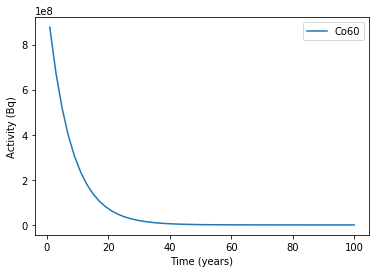

In [9]:
# now show how python will pass lists/arrays without a need to change the code
t = np.linspace(1,100) # time in years from 1 to 100 years
decay_time = t * 365 * 24 * 60 * 60 # convert to seconds  
act = calc_act_pandas(nuclide, ini_act, decay_time, data)


# plot 
plt.plot(t, act, label=nuclide)
plt.ylabel("Activity (Bq)")
plt.xlabel("Time (years)")
plt.legend()

